## Final Project Submission

Please fill out:
* Student name: JOHN AWALLAH OTHIM
* Student pace: part time
* Scheduled project review date/time: 
* Instructor name: BRIAN CHACHA
* Blog post URL:


## Objectives
1. Identify Low-risk aircraft Models for acquisition
2. Assess factors influencing Aircraft Safety and Reliability
3. Generate Data-Driven Business Recommendations to guide executives

## Loading the data
The first step is to load the data

In [1]:
import pandas as pd
import csv
import numpy as np
df = pd.read_csv('Aviation_Data.csv')

c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


## Exploring the data and its structure

In [2]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

## Identifying the important columns
The important columns identified using keys()

In [3]:
df.columns
#df.select_dtypes(include=['number']).columns

Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')

## Based on the objectives, the following columns should be retained for analysis;

'Event.Id', 'Accident.Number', 'Event.Date','Make', 'Model', 'Aircraft.Category', 'Engine.Type', 'Number.of.Engines', 'Aircraft.damage', 'Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight', 'Location', 'Country', 'Latitude', 'Longitude', 'Air.carrier', 'FAR.Description', 'Report.Status', 'Publication.Date'

## Filter Data to only Relevant Columns

In [4]:
Kept_columns = ['Event.Id', 'Accident.Number', 'Event.Date','Make', 'Model', 'Aircraft.Category', 'Engine.Type', 'Number.of.Engines', 'Aircraft.damage', 'Injury.Severity', 'Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight', 'Location', 'Country', 'Latitude', 'Longitude', 'Air.carrier', 'FAR.Description', 'Report.Status', 'Publication.Date']
df_filtered = df[Kept_columns]

In [5]:
df_filtered.head()

,Event.Id,Accident.Number,Event.Date,Make,Model,Aircraft.Category,Engine.Type,Number.of.Engines,Aircraft.damage,Injury.Severity,...,Weather.Condition,Broad.phase.of.flight,Location,Country,Latitude,Longitude,Air.carrier,FAR.Description,Report.Status,Publication.Date
0,20001218X45444,SEA87LA080,1948-10-24,Stinson,108-3,NaN,Reciprocating,1.0,Destroyed,Fatal(2),...,UNK,Cruise,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,Probable Cause,NaN
1,20001218X45447,LAX94LA336,1962-07-19,Piper,PA24-180,NaN,Reciprocating,1.0,Destroyed,Fatal(4),...,UNK,Unknown,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,Probable Cause,19-09-1996
2,20061025X01555,NYC07LA005,1974-08-30,Cessna,172M,NaN,Reciprocating,1.0,Destroyed,Fatal(3),...,IMC,Cruise,"Saltville, VA",United States,36.9222,-81.8781,NaN,NaN,Probable Cause,26-02-2007
3,20001218X45448,LAX96LA321,1977-06-19,Rockwell,112,NaN,Reciprocating,1.0,Destroyed,Fatal(2),...,IMC,Cruise,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,Probable Cause,12-09-2000
4,20041105X01764,CHI79FA064,1979-08-02,Cessna,501,NaN,NaN,NaN,Destroyed,Fatal(1),...,VMC,Approach,"Canton, OH",United States,NaN,NaN,NaN,NaN,Probable Cause,16-04-1980


In [6]:
available = [c for c in Kept_columns if c in df_filtered.columns]
df_filtered = df_filtered[available].copy()

In [7]:
for x in ['Event.Date', 'Publication.Date']:
    if x in df_filtered:
        df_filtered[x] = pd.to_datetime(df_filtered[x], errors= 'coerce')

## DATA CLEANING

## Identify numerical columns and make sure they are numeric

In [8]:
numerical_columns = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines', 'Latitude', 'Longitude']
print(numerical_columns)

['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines', 'Latitude', 'Longitude']


In [9]:
for x in [x for x in numerical_columns if x in df_filtered.columns]:
    df_filtered[x] = pd.to_numeric(df_filtered[x], errors='coerce')
df_filtered[numerical_columns].dtypes

Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Number.of.Engines         float64
Latitude                  float64
Longitude                 float64
dtype: object

## Text Columns Cleaning

In [10]:
cat_columns = ['Make', 'Model', 'Aircraft.Category', 'Engine.Type', 'Aircraft.damage', 'Injury.Severity', 'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight', 'Location', 'Country', 'Air.carrier', 'FAR.Description', 'Report.Status']
for x in [x for x in cat_columns if x in df_filtered]:
    df_filtered[x] = (df_filtered[x].astype(str).str.strip()
             .replace({'nan': '', 'None':'', 'NaN': ''}, regex=False))
    df_filtered[x] = df_filtered[x].replace('', np.nan).fillna('Unknown')

## removal of Duplicates

In [11]:
event_columns = [x for x in ['Event.Id', 'Accident.Number'] if x in df_filtered]
if event_columns:
    df_filtered = df_filtered.drop_duplicates(subset=event_columns)

Fill in missing values

In [12]:
for x in ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']:
    if x in df_filtered.columns:
        df_filtered[x] = df_filtered[x].fillna(0)

#Missing number of engines
if 'Number.of.Engines' in df_filtered.columns:
    df_filtered['Number.of.Engines'] = (
        df_filtered.groupby('Model', dropna=False)['Number.of.Engines']
        .transform(lambda g:g.fillna(g.median()))
    )
    global_median = df_filtered['Number.of.Engines'].median()
    df_filtered['Number.of.Engines'] = df_filtered['Number.of.Engines'].fillna(global_median)

c:\Users\USER\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


In [13]:
df_filtered[['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured', 'Number.of.Engines']].isna().sum()

Total.Fatal.Injuries      0
Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Uninjured           0
Number.of.Engines         0
dtype: int64

## DATA ANALYSIS
# Creating fatality and survival rates
This are metrics to help rank the aircraft models on the basis of their safety


In [14]:
#Creating a new column of total persons involved in each event
cols = ['Total.Fatal.Injuries', 'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured']
#sum across those columns
df_filtered['Total.People'] = df_filtered[cols].sum(axis=1, min_count=1)

#df_filtered['Total.People'] = (
    #df_filtered['Total.Fatal.Injuries'] + df_filtered['Total.Serious.Injuries']
    #+ df_filtered['Total.Minor.Injuries'] + df_filtered['Total.Uninjured']
#)

In [15]:
df_filtered['Total.People'] = df_filtered['Total.People'].replace(0, np.nan)

In [16]:
print(df_filtered.columns)

Index(['Event.Id', 'Accident.Number', 'Event.Date', 'Make', 'Model',
       'Aircraft.Category', 'Engine.Type', 'Number.of.Engines',
       'Aircraft.damage', 'Injury.Severity', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Purpose.of.flight', 'Weather.Condition', 'Broad.phase.of.flight',
       'Location', 'Country', 'Latitude', 'Longitude', 'Air.carrier',
       'FAR.Description', 'Report.Status', 'Publication.Date', 'Total.People'],
      dtype='object')


In [17]:
#denominator (avoid divide-by-zero and non-numeric issues)
den = pd.to_numeric(df_filtered['Total.People'], errors='coerce')
fatal = pd.to_numeric(df_filtered['Total.Fatal.Injuries'], errors='coerce')
uninjured = pd.to_numeric(df_filtered['Total.Uninjured'], errors='coerce')

In [18]:
df_filtered['Fatality.Rate'] = np.divide(
    fatal, den, out=np.full(den.shape, np.nan, dtype='float64'), where=den>0
)
df_filtered['Survival.Rate'] = np.divide(
    uninjured, den, out=np.full(den.shape, np.nan, dtype='float64'), where=den>0
)
df_filtered[['Fatality.Rate', 'Survival.Rate']] = (
    df_filtered[['Fatality.Rate', 'Survival.Rate']]
    .replace([np.inf, -np.inf], np.nan)
    .clip(0, 1)
)

# Summary of the severity of the accident

In [19]:
Accident_weights = (
    3*df_filtered['Total.Fatal.Injuries'] +
    2*df_filtered['Total.Serious.Injuries']+
    1*df_filtered['Total.Minor.Injuries']
)
df_filtered['Severity.Index'] = np.where(
    den > 0,
    Accident_weights/(3 * den),
    np.nan
)
df_filtered['Severity.Index'] = (
    df_filtered['Severity.Index']
    .replace([np.inf, -np.inf], np.nan)
    .fillna(0)
)
#df_filtered['Severity.Index'] = (Accident_weights/ (3*df_filtered['Total.People'])).fillna(0)

# Effect of weather conditions

In [20]:
wc = df_filtered['Weather.Condition'].str.lower()
df_filtered['Weather.Clean'] = np.select(
    [
        wc.str.contains('imc|instrument', na=False),
        wc.str.contains('snow|rain|storm|wind|fog|icing|hail|microburst', na=False),
        wc.str.contains('vmc|visual|clear', na=False)
    ],
    ['IMC', 'Adverse', 'VMC'],
    default='Unknown'
)

## Flight Phase Realignment
This will help highlight when most flight incidents occur


In [21]:
fp = df_filtered['Broad.phase.of.flight'].str.lower()
df_filtered['Phase.Group'] = np.select(
    [
        fp.str.contains('takeoff|initial climb|taxi', na=False),
        fp.str.contains('approach|landing|flare|go-around', na=False),
        fp.str.contains('enroute|cruise', na=False)
    ],
    ['Takeoff', 'Landing', 'Cruise'],
    default='Other'
)

## Trend Analysis of Time of the Event
Extract year to show trend

In [22]:
df_filtered['Event.Year'] = df_filtered['Event.Date'].dt.year

In [23]:
df_filtered[['Make', 'Model', 'Fatality.Rate', 'Survival.Rate', 'Severity.Index', 'Weather.Clean', 'Phase.Group', 'Event.Year']].head()

,Make,Model,Fatality.Rate,Survival.Rate,Severity.Index,Weather.Clean,Phase.Group,Event.Year
0,Stinson,108-3,1.000000,0.0,1.000000,Unknown,Cruise,1948.0
1,Piper,PA24-180,1.000000,0.0,1.000000,Unknown,Other,1962.0
2,Cessna,172M,1.000000,0.0,1.000000,IMC,Cruise,1974.0
3,Rockwell,112,1.000000,0.0,1.000000,IMC,Cruise,1977.0
4,Cessna,501,0.333333,0.0,0.777778,VMC,Landing,1979.0


In order to answer the first objective; Identifying low-risk aircraft models for acquisition, we need to compute the safety metrics per aircraft model using average fatality rate, average severity, and count of incidents per model

In [24]:
for col in ['Fatality.Rate', 'Severity.Index', 'Survival.Rate']:
    df_filtered[col] = pd.to_numeric(df_filtered[col], errors='coerce')
#Group by model
model_summary = (
    df_filtered.groupby(['Make', 'Model'])
    .agg(
        Accidents = ('Event.Id', 'count'),
        Avg_Fatality_Rate = ('Fatality.Rate', 'mean'),
        Avg_Severity = ('Severity.Index', 'mean'),
        Avg_Survival_Rate = ('Survival.Rate', 'mean')
    )
    .reset_index()
)

In [25]:
#Include a safety score
model_summary['Safety.Score'] = 1- (
    model_summary['Avg_Fatality_Rate'] * 0.6 + 
    model_summary['Avg_Severity'] * 0.4
)

Exclude events with few incidents (<5)

In [26]:
model_summary = model_summary[model_summary['Accidents'] >= 5]

Ranking the models by safety

In [27]:
safest_models = model_summary.sort_values('Safety.Score', ascending=True)
safest_models.head(10)

,Make,Model,Accidents,Avg_Fatality_Rate,Avg_Severity,Avg_Survival_Rate,Safety.Score
15926,ROBINSON,R-44,7,0.857143,0.904762,0.000000,0.123810
15572,Pterodactyl,ASCENDER II,5,0.800000,0.933333,0.000000,0.146667
5296,CIRRUS,SR-22,6,0.833333,0.833333,0.166667,0.166667
465,AMERICAN AVIATION,AA-1A,7,0.833333,0.761905,0.000000,0.195238
9345,GULFSTREAM AMERICAN CORP,AA-5A,5,0.800000,0.800000,0.200000,0.200000
15192,Piper,PA-31T2,5,0.800000,0.800000,0.200000,0.200000
14395,PIPER,PA-31P,5,0.800000,0.800000,0.200000,0.200000
15990,ROCKWELL INTERNATIONAL,690B,5,0.800000,0.800000,0.200000,0.200000
17121,SMITH,AEROSTAR 601P,5,0.800000,0.800000,0.200000,0.200000
3397,Beech,V35TC,5,0.700000,0.900000,0.000000,0.220000


## Visual Presentation

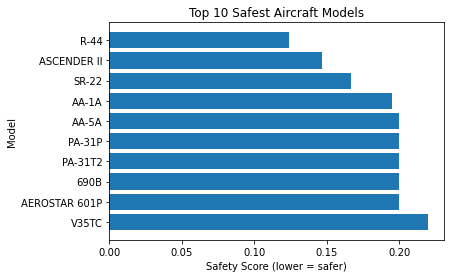

In [28]:
import matplotlib.pyplot as plt

top = model_summary.nsmallest(10, 'Safety.Score')
plt.barh(top['Model'], top['Safety.Score'])
plt.xlabel('Safety Score (lower = safer)')
plt.ylabel('Model')
plt.title('Top 10 Safest Aircraft Models')
plt.gca().invert_yaxis()
plt.show()

In [29]:
print(top['Safety.Score'])

15926    0.123810
15572    0.146667
5296     0.166667
465      0.195238
9345     0.200000
14395    0.200000
15192    0.200000
15990    0.200000
17121    0.200000
3397     0.220000
Name: Safety.Score, dtype: float64


In order to answer the second objective; Assess the key factors influencing aircraft safety and reliability, determine the relationship between accident severity/fatality rate and other variables such as weather, flight phase, and purpose of flight

In [30]:
#Determine which factors influence severity the most
#Compute average fatality and severity by the integral factors
#Start by weather;
Weather_Summary = (
    df_filtered.groupby('Weather.Clean')
    .agg(
        Accidents = ('Event.Id', 'count'),
        Avg_Fatality = ('Fatality.Rate', 'mean'),
        Avg_Severity = ('Severity.Index', 'mean')
    )
    .reset_index()
)
print(Weather_Summary)

  Weather.Clean  Accidents  Avg_Fatality  Avg_Severity
0           IMC       5976      0.549193      0.635037
1       Unknown       5599      0.431067      0.394443
2           VMC      77288      0.141422      0.260170


In [31]:
#Phase of Flight
Phase_Summary = (
    df_filtered.groupby('Phase.Group')
    .agg(
        Accidents = ('Event.Id', 'count'),
        Avg_Fatality = ('Fatality.Rate', 'mean'),
        Avg_Severity = ('Severity.Index', 'mean')
    )
    .reset_index()
)
print(Phase_Summary)

  Phase.Group  Accidents  Avg_Fatality  Avg_Severity
0      Cruise      10269      0.252689      0.370427
1     Landing      23327      0.080127      0.168607
2       Other      40816      0.253599      0.365728
3     Takeoff      14451      0.111613      0.238525


In [32]:
#Purpose of flight
Purpose_Summary = (
    df_filtered.groupby('Purpose.of.flight')
    .agg(
        Accidents = ('Event.Id', 'count'),
        Avg_Fatality = ('Fatality.Rate', 'mean'),
        Avg_Severity = ('Severity.Index', 'mean')
    )
    .reset_index()
    .sort_values('Avg_Fatality', ascending=False)
)
print(Purpose_Summary.head(10))

      Purpose.of.flight  Accidents  Avg_Fatality  Avg_Severity
0                  ASHO          5      0.600000      0.733333
5         Air Race/show         59      0.426554      0.600274
11         Firefighting         40      0.425000      0.543056
4         Air Race show         99      0.363636      0.488215
13           Glider Tow         53      0.245283      0.420335
2    Aerial Observation        794      0.243165      0.400012
7              Business       4015      0.242290      0.338644
25              Unknown      12983      0.228770      0.274030
3              Air Drop         11      0.227778      0.365320
8   Executive/corporate        553      0.220475      0.294923


## Visual presentation

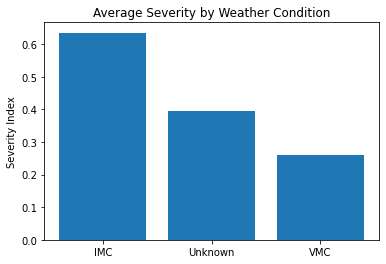

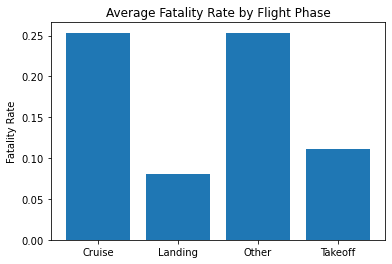

In [33]:
import matplotlib.pyplot as plt
#Weather vs Severity
plt.bar(Weather_Summary['Weather.Clean'], Weather_Summary['Avg_Severity'])
plt.title('Average Severity by Weather Condition')
plt.ylabel('Severity Index')
plt.show()

#Phase vs Fatality
plt.bar(Phase_Summary['Phase.Group'], Phase_Summary['Avg_Fatality'])
plt.title('Average Fatality Rate by Flight Phase')
plt.ylabel('Fatality Rate')
plt.show()

## Proposed List of Possible Models to acquire

In [34]:
#Focus should be on events that occured most recently
latest = df_filtered[df_filtered['Event.Year'] >= 2005].copy()

In [35]:
#Compute new safety summary based on latest data
latest_summary = (
    latest.groupby(['Make', 'Model'])
        .agg(
            Accidents = ('Event.Id', 'count'),
            Avg_Fatality_Rate = ('Fatality.Rate', 'mean'),
            Avg_Severity = ('Severity.Index', 'mean')
        )
        .reset_index()
)
latest_summary['Safety.Score'] = 0.6 * latest_summary['Avg_Fatality_Rate'] + 0.4 * latest_summary['Avg_Severity']

In [36]:
Proposed_List = (
    latest_summary
        .query('Accidents >= 5')
        .query('Avg_Fatality_Rate <= 0.05')
        .query('Avg_Severity <= 0.25')
        .sort_values('Safety.Score', ascending=True)
)
Proposed_List.head(10)

,Make,Model,Accidents,Avg_Fatality_Rate,Avg_Severity,Safety.Score
2299,Boeing,747,8,0.0,0.0,0.0
4215,EMBRAER,EMB145,8,0.0,0.0,0.0
8615,Robinson,R-22 Beta II,5,0.0,0.0,0.0
6842,Maule,MX7,5,0.0,0.0,0.0
8438,ROCKWELL INTERNATIONAL,114,9,0.0,0.0,0.0
3907,DIAMOND AIRCRAFT IND INC,DA 20 C1,11,0.0,0.0,0.0
8047,Piper,PA38,5,0.0,0.0,0.0
7916,Piper,PA-20,8,0.0,0.0,0.0
2261,Boeing,717-200,8,0.0,0.0,0.0
4936,GREAT LAKES,2T-1A-2,6,0.0,0.0,0.0


Operations and Training conditions

In [37]:
#weather risk by model
weather_risk = (
    df_filtered.groupby(['Make', 'Model', 'Weather.Clean'])
        .agg(Avg_Severity = ('Severity.Index', 'mean'), Accidents = ('Event.Id', 'count'))
        .reset_index()
)
#Phase risk by model
Phase_Risk = (
    df_filtered.groupby(['Make', 'Model', 'Phase.Group'])
        .agg(Avg_Severity =('Severity.Index', 'mean'), Accidents = ('Event.Id', 'count'))
        .reset_index()
)

In [38]:
# Merge core safety with simple risk notes
def risk_note(row):
    if row['Avg_Fatality_Rate'] <= 0.02 and row['Avg_Severity'] <= 0.20:
        return "Strong safety record; good acquisition candidate."
    if row['Avg_Fatality_Rate'] <= 0.05 and row['Avg_Severity'] <= 0.25:
        return "Acceptable safety; proceed with ops safeguards."
    return "Higher risk; prefer alternatives or require strong mitigations."

recs = Proposed_List.copy()
recs['Recommendation'] = recs.apply(risk_note, axis=1)

# Optional: attach quick context from weather/phase (top risk buckets)
w_ctx = (weather_risk.sort_values(['Make','Model','Avg_Severity'], ascending=[True,True,False])
                   .groupby(['Make','Model']).head(1)
                   .rename(columns={'Weather.Clean':'Top.Weather.Risk',
                                    'Avg_Severity':'Weather.Risk.Severity'}))

p_ctx = (Phase_Risk.sort_values(['Make','Model','Avg_Severity'], ascending=[True,True,False])
                  .groupby(['Make','Model']).head(1)
                  .rename(columns={'Phase.Group':'Top.Phase.Risk',
                                   'Avg_Severity':'Phase.Risk.Severity'}))

recs = (recs.merge(w_ctx[['Make','Model','Top.Weather.Risk','Weather.Risk.Severity']],
                   on=['Make','Model'], how='left')
 .merge(p_ctx[['Make','Model','Top.Phase.Risk','Phase.Risk.Severity']],
                   on=['Make','Model'], how='left'))

recs[['Make','Model','Accidents','Avg_Fatality_Rate','Avg_Severity','Safety.Score',
      'Top.Weather.Risk','Top.Phase.Risk','Recommendation']].head(10)

,Make,Model,Accidents,Avg_Fatality_Rate,Avg_Severity,Safety.Score,Top.Weather.Risk,Top.Phase.Risk,Recommendation
0,Boeing,747,8,0.0,0.0,0.0,Unknown,Cruise,Strong safety record; good acquisition candidate.
1,EMBRAER,EMB145,8,0.0,0.0,0.0,IMC,Other,Strong safety record; good acquisition candidate.
2,Robinson,R-22 Beta II,5,0.0,0.0,0.0,VMC,Landing,Strong safety record; good acquisition candidate.
3,Maule,MX7,5,0.0,0.0,0.0,VMC,Other,Strong safety record; good acquisition candidate.
4,ROCKWELL INTERNATIONAL,114,9,0.0,0.0,0.0,IMC,Other,Strong safety record; good acquisition candidate.
5,DIAMOND AIRCRAFT IND INC,DA 20 C1,11,0.0,0.0,0.0,VMC,Other,Strong safety record; good acquisition candidate.
6,Piper,PA38,5,0.0,0.0,0.0,VMC,Cruise,Strong safety record; good acquisition candidate.
7,Piper,PA-20,8,0.0,0.0,0.0,VMC,Other,Strong safety record; good acquisition candidate.
8,Boeing,717-200,8,0.0,0.0,0.0,VMC,Landing,Strong safety record; good acquisition candidate.
9,GREAT LAKES,2T-1A-2,6,0.0,0.0,0.0,VMC,Other,Strong safety record; good acquisition candidate.
